<div style='float: right'><img src='pic/paint.png'/></div>

## <div id='paint' />ペイントエリア

In [1]:
#!pip3 install pulp ortoolpy
%matplotlib inline
import pandas as pd, matplotlib.pyplot as plt
from pulp import LpProblem, lpSum, value
from ortoolpy import addbinvars, unionfind
data = """\
AABBC
DEFBC
DGFHH
DGIJH
KKLJH""".splitlines()
nums = [[0,1,3], [3,2,2], [4,1,1]]

### 問題
* 盤面上にある、太線で区切られた部分（タイル）のいくつかを黒くぬります
* 盤面の数字は、その数字の入っているマスにタテヨコに隣り合うマスのうち、黒マスになるマスの数を表します
* 数字のマスが黒マスになることもあります
* どのタイルも、すべてのマスをぬるかすべてのマスをぬらずにおくかのどちらとし、タイルの一部のマスだけをぬってはいけません
* すべての黒マスはつながること
* 黒白マスとも、２×２以上はだめ

### 変数
* v：0:white, 1:black (1)

### 制約
* 2×2の黒がないこと (2)
* タイル内は同じこと (3)
* 数字は周りの黒の数と等しいこと (4)
* 全ての黒がつながること (5)

In [2]:
ni, nj = len(data), len(data[0])
a = pd.DataFrame([(i,j,data[i][j]) for i in range(ni)
    for j in range(nj)], columns=list('行列字'))
a['Var'] = addbinvars(len(a))
a[:2]

,行,列,字,Var
0,0,0,A,v000001
1,0,1,A,v000002


In [3]:
m = LpProblem()
for i in range(ni-1):
    for j in range(nj-1):
        e = lpSum(a.query(f'{i}<=行<={i+1}&{j}<=列<={j+1}').Var)
        m += e >= 1 # 2×2の白がない
        m += e <= 3 # 2×2の黒がない
for _,v in a.groupby('字'):
    for vi, vj in zip(v.Var, v.Var[1:]):
        m += vi == vj # タイル内は同じ
for i, j, k in nums: # 数字は周りの黒の数と等しい
    m += lpSum(a.query(f'abs(行-{i})+abs(列-{j})==1').Var) == k
while True:
    m.solve()
    r = a.Var.apply(value)
    if unionfind.isconnected(r.values.reshape(ni,nj)):
        break # 全ての黒がつながる
    m += lpSum(a[r==0].Var) >= 1

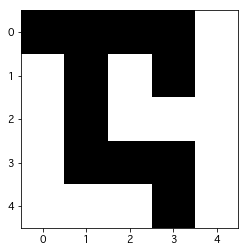

In [4]:
plt.imshow((1-r).values.reshape(ni,nj), cmap='gray', interpolation='none');